In [93]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [94]:
PL_19_20_df = pd.read_csv('data/2019_2020_Player_Stats.csv', skiprows=1)
PL_18_19_df = pd.read_csv('data/2018_2019_Player_Stats.csv', skiprows=1)
PL_17_18_df = pd.read_csv('data/2017_2018_Player_Stats.csv', skiprows=1)

In [95]:
PL_19_20_df.head()

,Rk,Player▲,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,20,20,1714.0,...,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14,Matches
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,25,25,2250.0,...,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16,Matches
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,25,23,1945.0,...,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67,Matches
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,21,8,712.0,...,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,10,8,783.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


### Clean up datasets

In [4]:
#clean up 19-20
PL_19_20_df = PL_19_20_df.rename(columns={"Player▲": "Player"})
PL_19_20_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,20,20,1714.0,...,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14,Matches
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,25,25,2250.0,...,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16,Matches
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,25,23,1945.0,...,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67,Matches
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,21,8,712.0,...,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,10,8,783.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


In [5]:
player_name_split = PL_19_20_df['Player'].str.split('\\')
player_name_split

0        [Patrick van Aanholt, Patrick-van-Aanholt]
1                          [Max Aarons, Max-Aarons]
2                    [Tammy Abraham, Tammy-Abraham]
3                            [Che Adams, Che-Adams]
4                                  [Adrián, Adrian]
                           ...                     
483                  [Wilfried Zaha, Wilfried-Zaha]
484    [Christoph Zimmermann, Christoph-Zimmermann]
485      [Oleksandr Zinchenko, Oleksandr-Zinchenko]
486                        [Kurt Zouma, Kurt-Zouma]
487                        [Mesut Özil, Mesut-Ozil]
Name: Player, Length: 488, dtype: object

In [6]:
player_names = player_name_split.map(lambda _:_[0])
player_names

0       Patrick van Aanholt
1                Max Aarons
2             Tammy Abraham
3                 Che Adams
4                    Adrián
               ...         
483           Wilfried Zaha
484    Christoph Zimmermann
485     Oleksandr Zinchenko
486              Kurt Zouma
487              Mesut Özil
Name: Player, Length: 488, dtype: object

In [7]:
PL_19_20_df['Player'] = player_names
PL_19_20_df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,20,20,1714.0,...,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14,Matches
1,2,Max Aarons,eng ENG,DF,Norwich City,19.0,2000.0,25,25,2250.0,...,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16,Matches
2,3,Tammy Abraham,eng ENG,FW,Chelsea,21.0,1997.0,25,23,1945.0,...,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67,Matches
3,4,Che Adams,eng ENG,FW,Southampton,23.0,1996.0,21,8,712.0,...,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35,Matches
4,5,Adrián,es ESP,GK,Liverpool,32.0,1987.0,10,8,783.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


In [8]:
#nation_split = PL_19_20_df['Nation'].str.split(' ', 1, expand=True)

In [9]:
#nation_split.rename(columns={0: 'A', 1: 'B'}, inplace=True)

In [10]:
#nation_split.drop(columns={'A'})

In [11]:
#PL_19_20_df['Nation'] = nation_split['B']

In [12]:
PL_19_20_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
PL_19_20_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
4,Adrián,GK,Liverpool,10,8,783.0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [13]:
position_counts = PL_19_20_df.Pos.value_counts()
position_counts

DF      170
MF      113
FW       74
MFFW     38
GK       36
FWMF     35
MFDF     15
DFFW      3
DFMF      3
FWDF      1
Name: Pos, dtype: int64

In [14]:
position_split = PL_19_20_df['Pos']
# Transform the string column 
def change_string(position_split):
    if len(position_split) > 2:
        return position_split[:2]
    else:
        return position_split
PL_19_20_df["Pos"] = PL_19_20_df["Pos"].apply(change_string)
PL_19_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
4,Adrián,GK,Liverpool,10,8,783.0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Wilfried Zaha,MF,Crystal Palace,27,26,2365.0,3,3,0,0,...,0.11,0.23,2.7,2.7,2.4,0.10,0.09,0.19,0.10,0.19
484,Christoph Zimmermann,DF,Norwich City,15,15,1296.0,0,1,0,0,...,0.00,0.07,0.4,0.4,0.0,0.03,0.00,0.03,0.03,0.03
485,Oleksandr Zinchenko,DF,Manchester City,11,9,829.0,0,0,0,0,...,0.00,0.00,0.3,0.3,0.7,0.04,0.08,0.12,0.04,0.12
486,Kurt Zouma,DF,Chelsea,21,18,1713.0,0,0,0,0,...,0.00,0.00,0.6,0.6,0.2,0.03,0.01,0.04,0.03,0.04


In [15]:
GK_19_20_df = PL_19_20_df[PL_19_20_df['Pos']=='GK']
GK_19_20_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
4,Adrián,GK,Liverpool,10,8,783.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00
11,Alisson,GK,Liverpool,19,19,1644.0,0,1,0,0,...,0.0,0.05,0.0,0.0,0.4,0.0,0.02,0.02,0.0,0.02
22,Kepa Arrizabalaga,GK,Chelsea,24,24,2160.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00
58,Claudio Bravo,GK,Manchester City,4,3,346.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00
63,Willy Caballero,GK,Chelsea,3,3,270.0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00


In [16]:
FMD_19_20_df = PL_19_20_df[PL_19_20_df['Pos']!='GK']
FMD_19_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
5,Sergio Agüero,FW,Manchester City,21,16,1342.0,16,3,2,3,...,0.94,1.14,13.3,11.0,2.5,0.89,0.17,1.06,0.74,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Wilfried Zaha,MF,Crystal Palace,27,26,2365.0,3,3,0,0,...,0.11,0.23,2.7,2.7,2.4,0.10,0.09,0.19,0.10,0.19
484,Christoph Zimmermann,DF,Norwich City,15,15,1296.0,0,1,0,0,...,0.00,0.07,0.4,0.4,0.0,0.03,0.00,0.03,0.03,0.03
485,Oleksandr Zinchenko,DF,Manchester City,11,9,829.0,0,0,0,0,...,0.00,0.00,0.3,0.3,0.7,0.04,0.08,0.12,0.04,0.12
486,Kurt Zouma,DF,Chelsea,21,18,1713.0,0,0,0,0,...,0.00,0.00,0.6,0.6,0.2,0.03,0.01,0.04,0.03,0.04


In [17]:
#FMD_19_20_df.to_csv(r'data/outfield_19_20.csv', index=False)

In [18]:
FWD_19_20_df = FMD_19_20_df[FMD_19_20_df['Pos']=='FW']
FWD_19_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
2,Tammy Abraham,FW,Chelsea,25,23,1945.0,13,3,0,0,...,0.60,0.74,12.2,12.2,2.3,0.56,0.11,0.67,0.56,0.67
3,Che Adams,FW,Southampton,21,8,712.0,0,2,0,0,...,0.00,0.25,1.9,1.9,0.9,0.24,0.11,0.35,0.24,0.35
5,Sergio Agüero,FW,Manchester City,21,16,1342.0,16,3,2,3,...,0.94,1.14,13.3,11.0,2.5,0.89,0.17,1.06,0.74,0.91
13,Miguel Almirón,FW,Newcastle Utd,26,26,2200.0,2,1,0,0,...,0.08,0.12,4.4,4.4,0.6,0.18,0.03,0.20,0.18,0.20
20,Michail Antonio,FW,West Ham,13,8,850.0,1,1,0,0,...,0.11,0.21,3.1,3.1,1.2,0.33,0.13,0.46,0.33,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Danny Welbeck,FW,Watford,8,3,261.0,0,0,0,0,...,0.00,0.00,0.6,0.6,0.1,0.22,0.02,0.24,0.22,0.24
466,Connor Wickham,FW,Crystal Palace,6,0,90.0,1,1,0,0,...,1.00,2.00,1.4,1.4,0.6,1.41,0.56,1.97,1.41,1.97
470,Willian,FW,Chelsea,26,20,1832.0,4,4,1,1,...,0.15,0.34,3.6,2.8,4.0,0.17,0.20,0.37,0.14,0.33
473,Callum Wilson,FW,Bournemouth,26,24,2170.0,7,0,0,0,...,0.29,0.29,7.7,7.7,2.2,0.32,0.09,0.41,0.32,0.41


In [19]:
MID_19_20_df = FMD_19_20_df[FMD_19_20_df['Pos']=='MF']
MID_19_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
6,Albian Ajeti,MF,West Ham,8,0,127.0,0,0,0,0,...,0.00,0.00,0.1,0.1,0.1,0.08,0.04,0.12,0.08,0.12
8,Marc Albrighton,MF,Leicester City,12,2,375.0,0,1,0,0,...,0.00,0.24,0.2,0.2,0.9,0.06,0.20,0.26,0.06,0.26
12,Dele Alli,MF,Tottenham,20,18,1584.0,7,3,0,0,...,0.40,0.57,5.4,5.4,2.2,0.31,0.12,0.43,0.31,0.43
15,Steven Alzate,MF,Brighton,18,12,1175.0,0,0,0,0,...,0.00,0.00,1.1,1.1,0.7,0.09,0.05,0.14,0.09,0.14
17,Felipe Anderson,MF,West Ham,20,19,1412.0,1,4,0,0,...,0.06,0.32,2.5,2.5,2.9,0.16,0.18,0.34,0.16,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Harry Winks,MF,Tottenham,22,18,1504.0,0,0,0,0,...,0.00,0.00,0.3,0.3,0.9,0.02,0.06,0.07,0.02,0.07
477,Granit Xhaka,MF,Arsenal,21,21,1818.0,0,1,0,0,...,0.00,0.05,0.2,0.2,0.9,0.01,0.04,0.06,0.01,0.06
478,Andriy Yarmolenko,MF,West Ham,15,9,828.0,3,1,0,0,...,0.33,0.43,1.5,1.5,2.5,0.16,0.27,0.43,0.16,0.43
483,Wilfried Zaha,MF,Crystal Palace,27,26,2365.0,3,3,0,0,...,0.11,0.23,2.7,2.7,2.4,0.10,0.09,0.19,0.10,0.19


In [20]:
MID_19_20_df['Year'] = '19-20'
MID_19_20_df

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Year
6,Albian Ajeti,MF,West Ham,8,0,127.0,0,0,0,0,...,0.00,0.1,0.1,0.1,0.08,0.04,0.12,0.08,0.12,19-20
8,Marc Albrighton,MF,Leicester City,12,2,375.0,0,1,0,0,...,0.24,0.2,0.2,0.9,0.06,0.20,0.26,0.06,0.26,19-20
12,Dele Alli,MF,Tottenham,20,18,1584.0,7,3,0,0,...,0.57,5.4,5.4,2.2,0.31,0.12,0.43,0.31,0.43,19-20
15,Steven Alzate,MF,Brighton,18,12,1175.0,0,0,0,0,...,0.00,1.1,1.1,0.7,0.09,0.05,0.14,0.09,0.14,19-20
17,Felipe Anderson,MF,West Ham,20,19,1412.0,1,4,0,0,...,0.32,2.5,2.5,2.9,0.16,0.18,0.34,0.16,0.34,19-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Harry Winks,MF,Tottenham,22,18,1504.0,0,0,0,0,...,0.00,0.3,0.3,0.9,0.02,0.06,0.07,0.02,0.07,19-20
477,Granit Xhaka,MF,Arsenal,21,21,1818.0,0,1,0,0,...,0.05,0.2,0.2,0.9,0.01,0.04,0.06,0.01,0.06,19-20
478,Andriy Yarmolenko,MF,West Ham,15,9,828.0,3,1,0,0,...,0.43,1.5,1.5,2.5,0.16,0.27,0.43,0.16,0.43,19-20
483,Wilfried Zaha,MF,Crystal Palace,27,26,2365.0,3,3,0,0,...,0.23,2.7,2.7,2.4,0.10,0.09,0.19,0.10,0.19,19-20


In [21]:
DEF_19_20_df = FMD_19_20_df[FMD_19_20_df['Pos']=='DF']
DEF_19_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,20,20,1714.0,3,0,1,1,...,0.11,0.11,1.8,1.0,1.6,0.09,0.08,0.18,0.05,0.14
1,Max Aarons,DF,Norwich City,25,25,2250.0,0,0,0,0,...,0.00,0.00,0.5,0.5,3.4,0.02,0.14,0.16,0.02,0.16
7,Nathan Aké,DF,Bournemouth,21,21,1835.0,2,1,0,0,...,0.10,0.15,2.2,2.2,0.6,0.11,0.03,0.14,0.11,0.14
9,Toby Alderweireld,DF,Tottenham,26,26,2328.0,1,2,0,0,...,0.04,0.12,0.7,0.7,0.9,0.03,0.04,0.06,0.03,0.06
10,Trent Alexander-Arnold,DF,Liverpool,27,26,2370.0,2,12,0,0,...,0.08,0.53,2.1,2.1,8.5,0.08,0.32,0.40,0.08,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Ashley Young,DF,Manchester Utd,12,10,954.0,0,0,0,0,...,0.00,0.00,0.1,0.1,1.2,0.01,0.11,0.12,0.01,0.12
482,Pablo Zabaleta,DF,West Ham,10,6,589.0,0,0,0,0,...,0.00,0.00,0.1,0.1,0.4,0.01,0.06,0.06,0.01,0.06
484,Christoph Zimmermann,DF,Norwich City,15,15,1296.0,0,1,0,0,...,0.00,0.07,0.4,0.4,0.0,0.03,0.00,0.03,0.03,0.03
485,Oleksandr Zinchenko,DF,Manchester City,11,9,829.0,0,0,0,0,...,0.00,0.00,0.3,0.3,0.7,0.04,0.08,0.12,0.04,0.12


In [22]:
#FWD_19_20_df.to_csv(r'data/FWD_19_20.csv', index=False)
#MID_19_20_df.to_csv(r'data/MID_19_20.csv', index=False)
#DEF_19_20_df.to_csv(r'data/DEF_19_20.csv', index=False)

In [23]:
#clean up 18-19
PL_18_19_df = PL_18_19_df.rename(columns={"Player▲": "Player"})
player_name_split = PL_18_19_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
PL_18_19_df['Player'] = player_names
#nation_split = PL_18_19_df['Nation'].str.split(' ', 1, expand=True)

In [24]:
#nation_split.rename(columns={0: 'A', 1: 'B'}, inplace=True)
#nation_split.drop(columns={'A'})
#PL_18_19_df['Nation'] = nation_split['B']
PL_18_19_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
position_split = PL_18_19_df['Pos']
# Transform the string column 
def change_string(position_split):
    if len(position_split) > 2:
        return position_split[:2]
    else:
        return position_split
PL_18_19_df["Pos"] = PL_18_19_df["Pos"].apply(change_string)
PL_18_19_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,36,36,3198.0,3,2,0,0,...,0.08,0.14,2.9,2.9,4.0,0.08,0.11,0.19,0.08,0.19
1,Sergio Agüero,FW,Manchester City,33,31,2480.0,21,8,2,2,...,0.69,0.98,20.3,18.8,5.2,0.74,0.19,0.93,0.68,0.87
2,Nathan Aké,DF,Bournemouth,38,38,3412.0,4,0,0,0,...,0.11,0.11,3.5,3.5,0.7,0.09,0.02,0.11,0.09,0.11
3,Marc Albrighton,FW,Leicester City,27,18,1626.0,2,2,0,0,...,0.11,0.22,1.0,1.0,2.9,0.05,0.16,0.21,0.05,0.21
4,Toby Alderweireld,DF,Tottenham,34,33,2923.0,0,0,0,0,...,0.00,0.00,1.3,1.3,0.5,0.04,0.02,0.05,0.04,0.05


In [25]:
FMD_18_19_df = PL_18_19_df[PL_18_19_df['Pos']!='GK']
FMD_18_19_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,36,36,3198.0,3,2,0,0,...,0.08,0.14,2.9,2.9,4.0,0.08,0.11,0.19,0.08,0.19
1,Sergio Agüero,FW,Manchester City,33,31,2480.0,21,8,2,2,...,0.69,0.98,20.3,18.8,5.2,0.74,0.19,0.93,0.68,0.87
2,Nathan Aké,DF,Bournemouth,38,38,3412.0,4,0,0,0,...,0.11,0.11,3.5,3.5,0.7,0.09,0.02,0.11,0.09,0.11
3,Marc Albrighton,FW,Leicester City,27,18,1626.0,2,2,0,0,...,0.11,0.22,1.0,1.0,2.9,0.05,0.16,0.21,0.05,0.21
4,Toby Alderweireld,DF,Tottenham,34,33,2923.0,0,0,0,0,...,0.00,0.00,1.3,1.3,0.5,0.04,0.02,0.05,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Andre-Frank Zambo Anguissa,MF,Fulham,22,16,1518.0,0,0,0,0,...,0.00,0.00,0.8,0.8,0.3,0.05,0.02,0.06,0.05,0.06
504,Davide Zappacosta,DF,Chelsea,4,1,125.0,0,0,0,0,...,0.00,0.00,0.1,0.1,0.1,0.05,0.11,0.15,0.05,0.15
505,Oleksandr Zinchenko,DF,Manchester City,14,14,1153.0,0,3,0,0,...,0.00,0.23,0.2,0.2,1.2,0.01,0.10,0.11,0.01,0.11
506,Kenneth Zohore,FW,Cardiff City,19,7,746.0,1,1,0,0,...,0.12,0.24,1.8,1.8,1.0,0.22,0.12,0.34,0.22,0.34


In [26]:
#FMD_18_19_df.to_csv(r'data/outfield_18_19.csv', index=False)

In [27]:
FWD_18_19_df = FMD_18_19_df[FMD_18_19_df['Pos']=='FW']
MID_18_19_df = FMD_18_19_df[FMD_18_19_df['Pos']=='MF']
DEF_18_19_df = FMD_18_19_df[FMD_18_19_df['Pos']=='DF']

In [28]:
#FWD_18_19_df.to_csv(r'data/FWD_18_19.csv', index=False)
#MID_18_19_df.to_csv(r'data/MID_18_19.csv', index=False)
#DEF_18_19_df.to_csv(r'data/DEF_18_19.csv', index=False)

In [29]:
#clean up17-18
PL_17_18_df = PL_17_18_df.rename(columns={"Player▲": "Player"})
player_name_split = PL_17_18_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
PL_17_18_df['Player'] = player_names
PL_17_18_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
position_split = PL_17_18_df['Pos']
# Transform the string column 
def change_string(position_split):
    if len(position_split) > 2:
        return position_split[:2]
    else:
        return position_split
PL_17_18_df["Pos"] = PL_17_18_df["Pos"].apply(change_string)
PL_17_18_df.head()

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,28,25,2184,5,1,0,0,...,0.21,0.25,3.4,3.4,1.7,0.14,0.07,0.21,0.14,0.21
1,Rolando Aarons,MF,Newcastle Utd,4,1,139,0,0,0,0,...,0.00,0.00,0.2,0.2,0.0,0.12,0.00,0.12,0.12,0.12
2,Tammy Abraham,FW,Swansea City,31,15,1726,6,1,0,0,...,0.31,0.37,6.4,6.4,0.8,0.33,0.04,0.38,0.33,0.38
3,Charlie Adam,MF,Stoke City,11,5,411,0,0,0,1,...,0.00,0.00,1.4,0.6,1.4,0.30,0.32,0.62,0.13,0.45
4,Adrián,GK,West Ham,19,19,1710,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [30]:
FMD_17_18_df = PL_17_18_df[PL_17_18_df['Pos']!='GK']
#FMD_17_18_df.to_csv(r'data/outfield_17_18.csv', index=False)

In [31]:
FWD_17_18_df = FMD_17_18_df[FMD_17_18_df['Pos']=='FW']
MID_17_18_df = FMD_17_18_df[FMD_17_18_df['Pos']=='MF']
DEF_17_18_df = FMD_17_18_df[FMD_17_18_df['Pos']=='DF']

In [32]:
#FWD_17_18_df.to_csv(r'data/FWD_17_18.csv', index=False)
#MID_17_18_df.to_csv(r'data/MID_17_18.csv', index=False)
#DEF_17_18_df.to_csv(r'data/DEF_17_18.csv', index=False)

In [33]:
GK_19_20_df = pd.read_csv('data/GK_19_20.csv', skiprows=1)
GK_19_20_df = GK_19_20_df.rename(columns={"Player▲": "Player"})
player_name_split = GK_19_20_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
GK_19_20_df['Player'] = player_names
GK_19_20_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
GK_19_20_df

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
0,Adrián,GK,Liverpool,10,8,783,9,1.03,25,16,0.640,8,0,0,2,25.0,0,0,0,0
1,Alisson,GK,Liverpool,20,20,1734,11,0.57,56,45,0.804,18,1,1,10,50.0,0,0,0,0
2,Kepa Arrizabalaga,GK,Chelsea,24,24,2160,32,1.33,69,41,0.565,12,4,8,5,20.8,2,2,0,0
3,Claudio Bravo,GK,Manchester City,4,3,346,7,1.82,15,8,0.533,2,0,1,1,33.3,0,0,0,0
4,Willy Caballero,GK,Chelsea,4,4,360,7,1.75,15,9,0.533,1,2,1,0,0.0,0,0,0,0
5,Martin Dúbravka,GK,Newcastle Utd,28,28,2520,41,1.46,149,108,0.725,8,8,12,8,28.6,0,0,0,0
6,Ederson,GK,Manchester City,24,24,2081,22,0.95,65,44,0.692,16,3,5,9,37.5,2,2,0,0
7,Łukasz Fabiański,GK,West Ham,15,15,1219,21,1.55,60,42,0.683,5,4,6,4,26.7,3,2,1,0
8,Ralf Fährmann,GK,Norwich City,1,1,22,1,4.09,1,1,1.000,0,0,1,0,0.0,1,1,0,0
9,Ben Foster,GK,Watford,28,28,2520,43,1.54,119,81,0.689,6,9,13,9,32.1,6,6,0,0


In [34]:
GK_19_20_df.fillna(0)

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
0,Adrián,GK,Liverpool,10,8,783,9,1.03,25,16,0.640,8,0,0,2,25.0,0,0,0,0
1,Alisson,GK,Liverpool,20,20,1734,11,0.57,56,45,0.804,18,1,1,10,50.0,0,0,0,0
2,Kepa Arrizabalaga,GK,Chelsea,24,24,2160,32,1.33,69,41,0.565,12,4,8,5,20.8,2,2,0,0
3,Claudio Bravo,GK,Manchester City,4,3,346,7,1.82,15,8,0.533,2,0,1,1,33.3,0,0,0,0
4,Willy Caballero,GK,Chelsea,4,4,360,7,1.75,15,9,0.533,1,2,1,0,0.0,0,0,0,0
5,Martin Dúbravka,GK,Newcastle Utd,28,28,2520,41,1.46,149,108,0.725,8,8,12,8,28.6,0,0,0,0
6,Ederson,GK,Manchester City,24,24,2081,22,0.95,65,44,0.692,16,3,5,9,37.5,2,2,0,0
7,Łukasz Fabiański,GK,West Ham,15,15,1219,21,1.55,60,42,0.683,5,4,6,4,26.7,3,2,1,0
8,Ralf Fährmann,GK,Norwich City,1,1,22,1,4.09,1,1,1.000,0,0,1,0,0.0,1,1,0,0
9,Ben Foster,GK,Watford,28,28,2520,43,1.54,119,81,0.689,6,9,13,9,32.1,6,6,0,0


In [35]:
#GK_19_20_df.to_csv(r'data/Clean_GK_19_20.csv', index=False)

In [36]:
GK_18_19_df = pd.read_csv('data/GK_18_19.csv', skiprows=1)
GK_18_19_df = GK_18_19_df.rename(columns={"Player▲": "Player"})
player_name_split = GK_18_19_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
GK_18_19_df['Player'] = player_names
GK_18_19_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
GK_18_19_df

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
0,Alisson,GK,Liverpool,38,38,3420.0,22,0.58,96,74,0.771,30,7,1,21,55.3,1,0,0,1
1,Kepa Arrizabalaga,GK,Chelsea,36,36,3240.0,39,1.08,117,78,0.675,20,8,8,14,38.9,2,1,1,0
2,Asmir Begović,GK,Bournemouth,24,24,2160.0,47,1.96,101,58,0.554,8,3,13,5,20.8,2,2,0,0
3,Marcus Bettinelli,GK,Fulham,7,7,630.0,20,2.86,38,19,0.500,1,2,4,0,0.0,3,1,1,1
4,Artur Boruc,GK,Bournemouth,12,12,1080.0,18,1.50,52,36,0.712,4,3,5,4,33.3,3,3,0,0
5,David Button,GK,Brighton,4,4,360.0,5,1.25,15,12,0.800,1,1,2,1,25.0,2,2,0,0
6,Willy Caballero,GK,Chelsea,2,2,180.0,0,0.00,3,3,1.000,1,1,0,2,100.0,0,0,0,0
7,Petr Čech,GK,Arsenal,7,7,585.0,9,1.38,36,27,0.750,5,0,2,2,28.6,0,0,0,0
8,Joel Coleman,GK,Huddersfield,1,1,90.0,1,1.00,3,1,0.667,0,1,0,0,0.0,0,0,0,0
9,Martin Dúbravka,GK,Newcastle Utd,38,38,3420.0,48,1.26,135,94,0.689,12,9,17,11,28.9,6,6,0,0


In [37]:
GK_18_19_df.fillna(0)

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
0,Alisson,GK,Liverpool,38,38,3420.0,22,0.58,96,74,0.771,30,7,1,21,55.3,1,0,0,1
1,Kepa Arrizabalaga,GK,Chelsea,36,36,3240.0,39,1.08,117,78,0.675,20,8,8,14,38.9,2,1,1,0
2,Asmir Begović,GK,Bournemouth,24,24,2160.0,47,1.96,101,58,0.554,8,3,13,5,20.8,2,2,0,0
3,Marcus Bettinelli,GK,Fulham,7,7,630.0,20,2.86,38,19,0.500,1,2,4,0,0.0,3,1,1,1
4,Artur Boruc,GK,Bournemouth,12,12,1080.0,18,1.50,52,36,0.712,4,3,5,4,33.3,3,3,0,0
5,David Button,GK,Brighton,4,4,360.0,5,1.25,15,12,0.800,1,1,2,1,25.0,2,2,0,0
6,Willy Caballero,GK,Chelsea,2,2,180.0,0,0.00,3,3,1.000,1,1,0,2,100.0,0,0,0,0
7,Petr Čech,GK,Arsenal,7,7,585.0,9,1.38,36,27,0.750,5,0,2,2,28.6,0,0,0,0
8,Joel Coleman,GK,Huddersfield,1,1,90.0,1,1.00,3,1,0.667,0,1,0,0,0.0,0,0,0,0
9,Martin Dúbravka,GK,Newcastle Utd,38,38,3420.0,48,1.26,135,94,0.689,12,9,17,11,28.9,6,6,0,0


In [38]:
#GK_18_19_df.to_csv(r'data/Clean_GK_18_19.csv')

In [39]:
GK_17_18_df = pd.read_csv('data/GK_17_18.csv', skiprows=1)
GK_17_18_df = GK_17_18_df.rename(columns={"Player▲": "Player"})
player_name_split = GK_17_18_df['Player'].str.split('\\')
player_names = player_name_split.map(lambda _:_[0])
GK_17_18_df['Player'] = player_names
GK_17_18_df.drop(columns=["Rk", "Matches", "Nation", "Age", "Born"], axis=1, inplace=True)
GK_17_18_df

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
0,Adrián,GK,West Ham,19,19,1710,29,1.53,95,68,0.705,7,6,6,6,31.6,1,1,0,0
1,Asmir Begović,GK,Bournemouth,38,38,3420,61,1.61,172,113,0.657,11,11,16,6,15.8,4,2,1,1
2,Claudio Bravo,GK,Manchester City,3,2,226,1,0.40,5,4,0.800,2,0,0,1,50.0,0,0,0,0
3,Jack Butland,GK,Stoke City,35,35,3150,61,1.74,199,145,0.719,7,11,17,6,17.1,5,5,0,0
4,Willy Caballero,GK,Chelsea,3,3,270,4,1.33,11,7,0.636,1,1,1,1,33.3,0,0,0,0
5,Petr Čech,GK,Arsenal,34,34,3039,48,1.42,129,86,0.667,16,6,12,11,32.4,6,5,1,0
6,Thibaut Courtois,GK,Chelsea,35,35,3150,34,0.97,105,75,0.695,20,6,9,15,42.9,2,2,0,0
7,Karl Darlow,GK,Newcastle Utd,10,10,900,15,1.50,45,35,0.733,1,5,4,2,20.0,3,3,0,0
8,Martin Dúbravka,GK,Newcastle Utd,12,12,1080,11,0.92,38,27,0.711,6,1,5,4,33.3,1,0,1,0
9,Ederson,GK,Manchester City,36,36,3194,26,0.73,79,54,0.671,30,4,2,16,44.4,3,0,2,1


In [40]:
#GK_17_18_df.to_csv(r'data/Clean_GK_17_18.csv', index=False)

### Machine learning model

In [41]:
#expected goal
expected_goals_count = PL_19_20_df['xG'].value_counts()
expected_goals_count

0.0     108
0.1      34
0.2      32
0.6      28
0.3      21
       ... 
4.8       1
10.8      1
13.1      1
3.1       1
6.9       1
Name: xG, Length: 78, dtype: int64

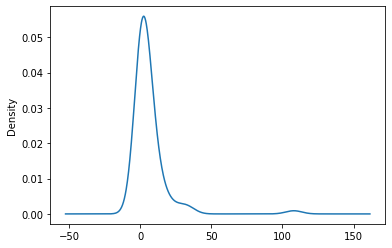

In [42]:
# Visualize the value counts
expected_goals_count.plot.density()

In [43]:
Goalies_17_20_df = pd.concat([GK_17_18_df, GK_18_19_df, GK_19_20_df]).fillna(0)
Goalies_17_20_df

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
0,Adrián,GK,West Ham,19,19,1710.0,29,1.53,95,68,0.705,7,6,6,6,31.6,1,1,0,0
1,Asmir Begović,GK,Bournemouth,38,38,3420.0,61,1.61,172,113,0.657,11,11,16,6,15.8,4,2,1,1
2,Claudio Bravo,GK,Manchester City,3,2,226.0,1,0.40,5,4,0.800,2,0,0,1,50.0,0,0,0,0
3,Jack Butland,GK,Stoke City,35,35,3150.0,61,1.74,199,145,0.719,7,11,17,6,17.1,5,5,0,0
4,Willy Caballero,GK,Chelsea,3,3,270.0,4,1.33,11,7,0.636,1,1,1,1,33.3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,Roberto,GK,West Ham,8,7,686.0,17,2.23,51,36,0.686,0,1,6,0,0.0,1,1,0,0
32,Mathew Ryan,GK,Brighton,28,28,2520.0,40,1.43,126,91,0.698,6,10,12,5,17.9,2,2,0,0
33,Kasper Schmeichel,GK,Leicester City,28,28,2520.0,28,1.00,103,80,0.777,15,5,8,9,32.1,6,5,1,0
34,Jed Steer,GK,Aston Villa,1,1,8.0,0,0.00,0,0,0.000,0,0,1,0,0.0,0,0,0,0


In [44]:
print((len(GK_17_18_df), len(GK_18_19_df), len(GK_19_20_df)), len(Goalies_17_20_df))
sum((38, 38, 36))

(38, 38, 36) 112


112

In [45]:
Goalies_17_20_df.loc[Goalies_17_20_df['Player'] == 'Kasper Schmeichel']

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
35,Kasper Schmeichel,GK,Leicester City,33,33,2965.0,47,1.43,135,90,0.659,11,10,12,8,24.2,3,1,2,0
34,Kasper Schmeichel,GK,Leicester City,38,38,3420.0,48,1.26,139,96,0.691,15,7,16,10,26.3,5,5,0,0
33,Kasper Schmeichel,GK,Leicester City,28,28,2520.0,28,1.00,103,80,0.777,15,5,8,9,32.1,6,5,1,0


In [46]:
Goalies_17_20_df = Goalies_17_20_df.groupby('Player').agg({ 'MP': ['sum'], 'Min': ['sum'],'GA': ['sum'],'SoTA': ['sum'],'Saves': ['sum'],
                                        'W': ['sum'], 'D': ['sum'], 'L': ['sum'], 'CS': ['sum'],
                                       'PKatt': ['sum'], 'PKA': ['sum'], 'PKsv': ['sum']})

In [47]:
Goalies_17_20_df.head()

,MP,Min,GA,SoTA,Saves,W,D,L,CS,PKatt,PKA,PKsv
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Player,,,,,,,,,,,,
Aaron Ramsdale,27,2430.0,42,131,93,7,6,14,4,4,4,0
Adrián,29,2493.0,38,120,84,15,6,6,8,1,1,0
Alex McCarthy,61,5490.0,96,257,168,16,18,27,12,4,4,0
Alisson,58,5154.0,33,152,119,48,8,2,31,1,0,0
Angus Gunn,22,1980.0,43,101,60,6,6,10,5,3,2,1


In [48]:
for col in Goalies_17_20_df.columns:
    print(col)

('MP', 'sum')
('Min', 'sum')
('GA', 'sum')
('SoTA', 'sum')
('Saves', 'sum')
('W', 'sum')
('D', 'sum')
('L', 'sum')
('CS', 'sum')
('PKatt', 'sum')
('PKA', 'sum')
('PKsv', 'sum')


In [49]:
#Export Goalies_17_20_df
#Goalies_17_20_df.to_csv(r'data/Clean_GK_17_20.csv', index=False)

In [50]:
FWD_17_20_df = pd.concat([FWD_17_18_df, FWD_18_19_df, FWD_19_20_df])
FWD_17_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
2,Tammy Abraham,FW,Swansea City,31,15,1726.0,6,1,0,0,...,0.31,0.37,6.4,6.4,0.8,0.33,0.04,0.38,0.33,0.38
6,Benik Afobe,FW,Bournemouth,17,5,611.0,0,0,0,0,...,0.00,0.00,1.8,1.8,0.0,0.31,0.01,0.31,0.31,0.31
7,Sergio Agüero,FW,Manchester City,25,22,1963.0,21,6,4,4,...,0.78,1.05,17.3,14.3,6.2,0.79,0.28,1.07,0.65,0.93
17,Nordin Amrabat,FW,Watford,3,3,198.0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.1,0.02,0.06,0.08,0.02,0.08
18,Michail Antonio,FW,West Ham,21,16,1354.0,3,1,0,0,...,0.20,0.27,2.2,2.2,0.9,0.15,0.06,0.21,0.15,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Danny Welbeck,FW,Watford,8,3,261.0,0,0,0,0,...,0.00,0.00,0.6,0.6,0.1,0.22,0.02,0.24,0.22,0.24
466,Connor Wickham,FW,Crystal Palace,6,0,90.0,1,1,0,0,...,1.00,2.00,1.4,1.4,0.6,1.41,0.56,1.97,1.41,1.97
470,Willian,FW,Chelsea,26,20,1832.0,4,4,1,1,...,0.15,0.34,3.6,2.8,4.0,0.17,0.20,0.37,0.14,0.33
473,Callum Wilson,FW,Bournemouth,26,24,2170.0,7,0,0,0,...,0.29,0.29,7.7,7.7,2.2,0.32,0.09,0.41,0.32,0.41


In [51]:
player_19_20 = list(FWD_19_20_df['Player'])
player_19_20

['Tammy Abraham',
 'Che Adams',
 'Sergio Agüero',
 'Miguel Almirón',
 'Michail Antonio',
 'Christian Atsu',
 'Pierre-Emerick Aubameyang',
 'Jordan Ayew',
 'Ashley Barnes',
 'Michy Batshuayi',
 'Christian Benteke',
 'Steven Bergwijn',
 'Jarrod Bowen',
 'Emi Buendía',
 'Dominic Calvert-Lewin',
 'Todd Cantwell',
 'Andy Carroll',
 'Tahith Chong',
 'Aaron Connolly',
 'Patrick Cutrone',
 'Keinan Davis',
 'Troy Deeney',
 'Gerard Deulofeu',
 'Josip Drmić',
 'Harvey Elliot',
 'Roberto Firmino',
 'Dwight Gayle',
 'Anwar El Ghazi',
 'Olivier Giroud',
 'Andre Gray',
 'Jack Grealish',
 'Mason Greenwood',
 'Sébastien Haller',
 'Javier Hernández',
 'Onel Hernández',
 'Son Heung-min',
 'Callum Hudson-Odoi',
 'Adam Idah',
 'Odion Ighalo',
 'Kelechi Iheanacho',
 'Danny Ings',
 'Alireza Jahanbakhsh',
 'Daniel James',
 'Gabriel Jesus',
 'Raúl Jiménez',
 'Joelinton',
 'Diogo Jota',
 'Jota',
 'Harry Kane',
 'Moise Kean',
 'Joshua King',
 'Jonathan Kodjia',
 'Alexandre Lacazette',
 'Shane Long',
 'Riyad Mahr

In [53]:
for col in FWD_17_20_df.columns:
    print(col)

Player
Pos
Squad
MP
Starts
Min
Gls
Ast
PK
PKatt
CrdY
CrdR
Gls.1
Ast.1
G+A
G-PK
G+A-PK
xG
npxG
xA
xG.1
xA.1
xG+xA
npxG.1
npxG+xA


In [54]:
FWD_17_20_df.drop(columns=["Squad","G-PK", "G+A-PK", "Gls.1", "Ast.1", "G+A", "G-PK", "G+A-PK", "xG.1", "xA.1",
                          "xG+xA", "npxG.1", "npxG+xA"], axis=1, inplace=True)

In [55]:
FWD_17_20_df

,Player,Pos,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
2,Tammy Abraham,FW,31,15,1726.0,6,1,0,0,0,0,6.4,6.4,0.8
6,Benik Afobe,FW,17,5,611.0,0,0,0,0,0,0,1.8,1.8,0.0
7,Sergio Agüero,FW,25,22,1963.0,21,6,4,4,2,0,17.3,14.3,6.2
17,Nordin Amrabat,FW,3,3,198.0,0,0,0,0,0,0,0.0,0.0,0.1
18,Michail Antonio,FW,21,16,1354.0,3,1,0,0,1,0,2.2,2.2,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Danny Welbeck,FW,8,3,261.0,0,0,0,0,0,0,0.6,0.6,0.1
466,Connor Wickham,FW,6,0,90.0,1,1,0,0,0,0,1.4,1.4,0.6
470,Willian,FW,26,20,1832.0,4,4,1,1,3,0,3.6,2.8,4.0
473,Callum Wilson,FW,26,24,2170.0,7,0,0,0,7,0,7.7,7.7,2.2


In [56]:
FWD_17_20_sum_df = FWD_17_20_df.groupby('Player').sum().reset_index()

In [57]:
#pd.set_option("display.max_rows", None)
print(FWD_17_20_df)

              Player Pos  MP  Starts     Min  Gls  Ast  PK  PKatt  CrdY  CrdR  \
2      Tammy Abraham  FW  31      15  1726.0    6    1   0      0     0     0   
6        Benik Afobe  FW  17       5   611.0    0    0   0      0     0     0   
7      Sergio Agüero  FW  25      22  1963.0   21    6   4      4     2     0   
17    Nordin Amrabat  FW   3       3   198.0    0    0   0      0     0     0   
18   Michail Antonio  FW  21      16  1354.0    3    1   0      0     1     0   
..               ...  ..  ..     ...     ...  ...  ...  ..    ...   ...   ...   
464    Danny Welbeck  FW   8       3   261.0    0    0   0      0     0     0   
466   Connor Wickham  FW   6       0    90.0    1    1   0      0     0     0   
470          Willian  FW  26      20  1832.0    4    4   1      1     3     0   
473    Callum Wilson  FW  26      24  2170.0    7    0   0      0     7     0   
476       Chris Wood  FW  24      24  1947.0   10    1   0      0     1     0   

       xG  npxG   xA  
2   

In [58]:
#FWD_17_20_df.loc[FWD_17_20_df['Player'] == 'Sergio Agüero']
print((len(FWD_17_18_df), len(FWD_18_19_df), len(FWD_19_20_df)), len(FWD_17_20_df))

(134, 145, 110) 389


In [59]:
FWD_17_20_df.dtypes

Player     object
Pos        object
MP          int64
Starts      int64
Min       float64
Gls         int64
Ast         int64
PK          int64
PKatt       int64
CrdY        int64
CrdR        int64
xG        float64
npxG      float64
xA        float64
dtype: object

In [60]:
FWD_17_20_sum_df

,Player,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
0,Aaron Connolly,17,9,834.0,2,0,0,0,0,0,2.4,2.4,0.2
1,Aaron Lennon,31,23,2009.0,1,1,0,0,1,0,0.8,0.8,1.1
2,Aaron Rowe,2,1,69.0,0,0,0,0,0,0,0.0,0.0,0.0
3,Abdelhamid Sabiri,2,1,48.0,0,0,0,0,0,0,0.0,0.0,0.0
4,Aboubakar Kamara,13,5,690.0,3,0,1,2,2,0,3.7,2.2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Xherdan Shaqiri,66,49,4270.0,15,10,0,1,7,0,9.8,9.0,8.2
232,Yoshinori Mutō,24,7,717.0,1,0,0,0,1,0,0.9,0.9,0.4
233,Zlatan Ibrahimović,5,1,106.0,0,0,0,0,0,0,0.3,0.3,0.1
234,Álvaro Morata,47,35,3004.0,16,6,0,0,10,0,19.4,19.4,3.6


In [61]:
FWD_17_20_sum_df[FWD_17_20_sum_df.Player.isin(player_19_20)]

,Player,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
0,Aaron Connolly,17,9,834.0,2,0,0,0,0,0,2.4,2.4,0.2
5,Adam Idah,2,1,65.0,0,0,0,0,0,0,0.0,0.0,0.0
7,Adama Traoré,55,29,2864.0,5,8,0,0,1,0,3.3,3.3,7.1
12,Alexandre Lacazette,86,68,5994.0,33,15,2,2,8,0,29.0,27.5,8.2
14,Alireza Jahanbakhsh,25,15,1288.0,2,0,0,0,2,0,1.3,1.3,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Trézéguet,24,13,1324.0,3,1,0,0,4,1,2.8,2.8,0.7
226,Wesley Moraes,21,21,1790.0,5,1,0,1,3,0,5.2,4.4,0.9
229,Willian,94,66,5830.0,13,17,2,2,6,0,13.1,11.5,15.3
231,Xherdan Shaqiri,66,49,4270.0,15,10,0,1,7,0,9.8,9.0,8.2


In [62]:
#Export FWD_17_20_sum_df
#FWD_17_20_sum_df.to_csv(r'data/FWD_17_20_sum_df.csv', index=False)

In [63]:
MID_17_20_df = pd.concat([MID_17_18_df, MID_18_19_df, MID_19_20_df])
MID_17_20_df

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Ast,Ast.1,CrdR,CrdY,G+A,G+A-PK,G-PK,Gls,Gls.1,MP,...,Starts,Year,npxG,npxG+xA,npxG.1,xA,xA.1,xG,xG+xA,xG.1
1,0,0.00,0,0,0.00,0.00,0.00,0,0.00,4,...,1,NaN,0.2,0.12,0.12,0.0,0.00,0.2,0.12,0.12
3,0,0.00,1,2,0.00,0.00,0.00,0,0.00,11,...,5,NaN,0.6,0.45,0.13,1.4,0.32,1.4,0.62,0.30
5,0,0.00,0,1,0.00,0.00,0.00,0,0.00,6,...,1,NaN,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00
9,7,0.25,1,5,0.32,0.32,0.07,2,0.07,34,...,30,NaN,1.5,0.21,0.05,4.4,0.16,1.5,0.21,0.05
12,6,0.17,0,8,0.23,0.23,0.06,2,0.06,36,...,36,NaN,2.4,0.15,0.07,2.7,0.08,2.4,0.15,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0.00,0,7,0.00,0.00,0.00,0,0.00,22,...,18,19-20,0.3,0.07,0.02,0.9,0.06,0.3,0.07,0.02
477,1,0.05,0,7,0.05,0.05,0.00,0,0.00,21,...,21,19-20,0.2,0.06,0.01,0.9,0.04,0.2,0.06,0.01
478,1,0.11,0,2,0.43,0.43,0.33,3,0.33,15,...,9,19-20,1.5,0.43,0.16,2.5,0.27,1.5,0.43,0.16
483,3,0.11,0,3,0.23,0.23,0.11,3,0.11,27,...,26,19-20,2.7,0.19,0.10,2.4,0.09,2.7,0.19,0.10


In [64]:
mid_player_19_20 = list(MID_19_20_df['Player'])
mid_player_19_20

['Albian Ajeti',
 'Marc Albrighton',
 'Dele Alli',
 'Steven Alzate',
 'Felipe Anderson',
 'Florin Andone',
 'Stuart Armstrong',
 'Ross Barkley',
 'Harvey Barnes',
 'Borja Bastón',
 'Nabil Bentaleb',
 'Jóhann Berg Guðmundsson',
 'Sander Berge',
 'Bernard',
 'Muhamed Bešić',
 'Philip Billing',
 'Yves Bissouma',
 'Gaëtan Bong',
 'Sofiane Boufal',
 'Robbie Brady',
 'Josh Brownhill',
 'Víctor Camarasa',
 'Étienne Capoue',
 'Dani Ceballos',
 'Nathaniel Chalobah',
 'Hamza Choudhury',
 'Leon Clarke',
 'Tom Cleverley',
 'Lewis Cook',
 'Jack Cork',
 'Tom Davies',
 'Kevin De Bruyne',
 'Fabian Delph',
 'Eric Dier',
 'Moussa Djenepo',
 'Abdoulaye Doucouré',
 'Danny Drinkwater',
 'Danny Drinkwater',
 'Ondrej Duda',
 'Christian Eriksen',
 'Fabinho',
 'Bruno Fernandes',
 'Gedson Fernandes',
 'John Fleck',
 'Phil Foden',
 'Pablo Fornals',
 'Dimitri Foulquier',
 'Ryan Fraser',
 'Fred',
 'Luke Freeman',
 'James Garner',
 'Jean-Philippe Gbamin',
 'Morgan Gibbs-White',
 'Billy Gilmour',
 'André Gomes',
 'A

In [65]:
MID_17_20_df.loc[MID_17_20_df['Player'] == 'Dele Alli']

,Ast,Ast.1,CrdR,CrdY,G+A,G+A-PK,G-PK,Gls,Gls.1,MP,...,Starts,Year,npxG,npxG+xA,npxG.1,xA,xA.1,xG,xG+xA,xG.1
13,10,0.30,0,7,0.58,0.58,0.27,9,0.27,36,...,34,NaN,9.2,0.51,0.28,7.7,0.23,9.2,0.51,0.28
7,3,0.15,0,4,0.39,0.39,0.25,5,0.25,25,...,22,NaN,5.1,0.38,0.25,2.5,0.12,5.1,0.38,0.25
12,3,0.17,0,2,0.57,0.57,0.40,7,0.40,20,...,18,19-20,5.4,0.43,0.31,2.2,0.12,5.4,0.43,0.31


In [66]:
MID_17_20_df.drop(columns=["Squad","G-PK", "G+A-PK", "Gls.1", "Ast.1", "G+A", "G-PK", "G+A-PK", "xG.1", "xA.1",
                          "xG+xA", "npxG.1", "npxG+xA"], axis=1, inplace=True)

In [67]:
MID_17_20_sum_df = MID_17_20_df.groupby('Player').sum().fillna(0).reset_index()
MID_17_20_sum_df.head()

,Player,Ast,CrdR,CrdY,Gls,MP,Min,PK,PKatt,Starts,npxG,xA,xG
0,Aaron Lennon,2,0,6,0,29,1602.0,0,0,17,0.6,1.2,0.6
1,Aaron Mooy,5,1,10,9,85,6873.0,2,2,77,5.4,8.9,6.8
2,Aaron Ramsey,14,0,0,11,52,3174.0,0,0,35,8.9,7.4,8.9
3,Abdelhamid Sabiri,1,0,1,0,5,220.0,0,0,2,0.3,0.2,0.3
4,Abdoulaye Doucouré,10,0,24,16,98,8657.0,0,0,97,12.5,8.2,12.5


In [68]:
MID_17_20_sum_df[MID_17_20_sum_df.Player.isin(mid_player_19_20)]

,Player,Ast,CrdR,CrdY,Gls,MP,Min,PK,PKatt,Starts,npxG,xA,xG
0,Aaron Lennon,2,0,6,0,29,1602.0,0,0,17,0.6,1.2,0.6
1,Aaron Mooy,5,1,10,9,85,6873.0,2,2,77,5.4,8.9,6.8
4,Abdoulaye Doucouré,10,0,24,16,98,8657.0,0,0,97,12.5,8.2,12.5
5,Adam Lallana,1,0,3,1,38,1111.0,0,0,9,2.8,1.4,2.8
9,Albian Ajeti,0,0,0,0,8,127.0,0,0,0,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Youri Tielemans,9,0,3,6,39,3215.0,0,0,37,4.1,6.4,4.1
298,Yves Bissouma,0,0,7,0,39,2264.0,0,0,23,1.7,1.2,1.7
299,Érik Lamela,1,0,2,2,16,858.0,0,0,9,2.0,1.5,2.0
300,Étienne Capoue,5,1,23,2,78,6448.0,0,0,73,2.8,3.1,2.8


In [69]:
#Export MID_17_20_sum_df
#MID_17_20_sum_df.to_csv(r'data/MID_17_20_sum_df.csv', index=False)

In [70]:
DEF_17_20_df = pd.concat([DEF_17_18_df, DEF_18_19_df, DEF_19_20_df])
DEF_17_20_df

,Player,Pos,Squad,MP,Starts,Min,Gls,Ast,PK,PKatt,...,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA
0,Patrick van Aanholt,DF,Crystal Palace,28,25,2184.0,5,1,0,0,...,0.21,0.25,3.4,3.4,1.7,0.14,0.07,0.21,0.14,0.21
8,Nathan Aké,DF,Bournemouth,38,37,3353.0,2,3,0,0,...,0.05,0.13,2.1,2.1,1.8,0.06,0.05,0.10,0.06,0.10
10,Toby Alderweireld,DF,Tottenham,14,13,1178.0,0,0,0,0,...,0.00,0.00,0.5,0.5,0.3,0.04,0.02,0.06,0.04,0.06
11,Trent Alexander-Arnold,DF,Liverpool,19,18,1573.0,1,1,0,0,...,0.06,0.11,1.2,1.2,2.4,0.07,0.14,0.21,0.07,0.21
15,Daniel Amartey,DF,Leicester City,8,6,487.0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Ashley Young,DF,Manchester Utd,12,10,954.0,0,0,0,0,...,0.00,0.00,0.1,0.1,1.2,0.01,0.11,0.12,0.01,0.12
482,Pablo Zabaleta,DF,West Ham,10,6,589.0,0,0,0,0,...,0.00,0.00,0.1,0.1,0.4,0.01,0.06,0.06,0.01,0.06
484,Christoph Zimmermann,DF,Norwich City,15,15,1296.0,0,1,0,0,...,0.00,0.07,0.4,0.4,0.0,0.03,0.00,0.03,0.03,0.03
485,Oleksandr Zinchenko,DF,Manchester City,11,9,829.0,0,0,0,0,...,0.00,0.00,0.3,0.3,0.7,0.04,0.08,0.12,0.04,0.12


In [71]:
def_player_19_20 = list(DEF_19_20_df['Player'])
def_player_19_20

['Patrick van Aanholt',
 'Max Aarons',
 'Nathan Aké',
 'Toby Alderweireld',
 'Trent Alexander-Arnold',
 'Marcos Alonso',
 'Ibrahim Amadou',
 'Angeliño',
 'Serge Aurier',
 'César Azpilicueta',
 'Eric Bailly',
 'Leighton Baines',
 'Fabián Balbuena',
 'George Baldock',
 'Phil Bardsley',
 'Chris Basham',
 'Jan Bednarek',
 'Héctor Bellerín',
 'Ryan Bennett',
 'Bernardo',
 'Ryan Bertrand',
 'Willy Boly',
 'Dan Burn',
 'Sam Byram',
 'Gary Cahill',
 'João Cancelo',
 'Jonny Castro',
 'Craig Cathcart',
 'Calum Chambers',
 'Ben Chilwell',
 'Andreas Christensen',
 'Ciaran Clark',
 'Conor Coady',
 'Séamus Coleman',
 'Steve Cook',
 'Aaron Cresswell',
 'Diogo Dalot',
 'Charlie Daniels',
 'Scott Dann',
 'Kevin Danso',
 'Ben Davies',
 'Craig Dawson',
 'Leander Dendoncker',
 'Lucas Digne',
 'Virgil van Dijk',
 'Issa Diop',
 'Matt Doherty',
 'Shane Duffy',
 'Paul Dummett',
 'Lewis Dunk',
 'John Egan',
 'Ahmed Elmohamady',
 'Björn Engels',
 'Jonny Evans',
 'Kiko Femenía',
 'Fernandinho',
 'Federico Fernán

In [72]:
DEF_17_20_df.drop(columns=["Squad","G-PK", "G+A-PK", "Gls.1", "Ast.1", "G+A", "G-PK", "G+A-PK", "xG.1", "xA.1",
                          "xG+xA", "npxG.1", "npxG+xA"], axis=1, inplace=True)

In [73]:
DEF_17_20_sum_df = DEF_17_20_df.groupby('Player').sum().fillna(0).reset_index()
DEF_17_20_sum_df

,Player,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
0,Aaron Cresswell,77,74,6504.0,4,4,0,0,14,0,2.3,2.3,4.8
1,Aaron Wan-Bissaka,66,66,5912.0,0,5,0,0,10,1,0.9,0.9,4.6
2,Adam Masina,29,22,2045.0,1,1,0,0,8,0,0.4,0.4,0.8
3,Adam Smith,68,63,5523.0,2,5,0,0,16,1,1.5,1.5,2.4
4,Adam Webster,21,21,1836.0,3,1,0,0,3,0,1.1,1.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Yerry Mina,38,33,2975.0,3,1,0,0,6,0,3.0,3.0,0.4
274,Yohan Benalouane,1,1,90.0,0,0,0,0,0,0,0.1,0.1,0.0
275,Younès Kaboul,2,2,150.0,0,0,0,0,0,0,0.0,0.0,0.0
276,Àngel Rangel,4,2,156.0,0,0,0,0,0,0,0.0,0.0,0.1


In [74]:
DEF_17_20_sum_df[DEF_17_20_sum_df.Player.isin(def_player_19_20)]

,Player,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
0,Aaron Cresswell,77,74,6504.0,4,4,0,0,14,0,2.3,2.3,4.8
1,Aaron Wan-Bissaka,66,66,5912.0,0,5,0,0,10,1,0.9,0.9,4.6
2,Adam Masina,29,22,2045.0,1,1,0,0,8,0,0.4,0.4,0.8
3,Adam Smith,68,63,5523.0,2,5,0,0,16,1,1.5,1.5,2.4
4,Adam Webster,21,21,1836.0,3,1,0,0,3,0,1.1,1.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Wes Morgan,62,54,4900.0,3,0,0,0,7,2,3.6,3.6,0.4
270,Willy Boly,47,47,4157.0,4,1,0,0,4,2,2.8,2.8,1.2
272,Yan Valery,31,27,2271.0,2,1,0,0,5,1,0.8,0.8,0.9
273,Yerry Mina,38,33,2975.0,3,1,0,0,6,0,3.0,3.0,0.4


In [75]:
#Export DEF_17_20_sum_df
#DEF_17_20_sum_df.to_csv(r'data/DEF_17_20_sum_df.csv', index=False)

In [76]:
GK_17_20_df = pd.concat([GK_17_18_df, GK_18_19_df, GK_19_20_df]).fillna(0)
GK_17_20_df

,Player,Pos,Squad,MP,Starts,Min,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm
0,Adrián,GK,West Ham,19,19,1710.0,29,1.53,95,68,0.705,7,6,6,6,31.6,1,1,0,0
1,Asmir Begović,GK,Bournemouth,38,38,3420.0,61,1.61,172,113,0.657,11,11,16,6,15.8,4,2,1,1
2,Claudio Bravo,GK,Manchester City,3,2,226.0,1,0.40,5,4,0.800,2,0,0,1,50.0,0,0,0,0
3,Jack Butland,GK,Stoke City,35,35,3150.0,61,1.74,199,145,0.719,7,11,17,6,17.1,5,5,0,0
4,Willy Caballero,GK,Chelsea,3,3,270.0,4,1.33,11,7,0.636,1,1,1,1,33.3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,Roberto,GK,West Ham,8,7,686.0,17,2.23,51,36,0.686,0,1,6,0,0.0,1,1,0,0
32,Mathew Ryan,GK,Brighton,28,28,2520.0,40,1.43,126,91,0.698,6,10,12,5,17.9,2,2,0,0
33,Kasper Schmeichel,GK,Leicester City,28,28,2520.0,28,1.00,103,80,0.777,15,5,8,9,32.1,6,5,1,0
34,Jed Steer,GK,Aston Villa,1,1,8.0,0,0.00,0,0,0.000,0,0,1,0,0.0,0,0,0,0


In [96]:
GK_17_20_df.drop(columns=["GA90", "Save%", "CS%"], axis=1, inplace=True)

GK_17_20_sum_df = GK_17_20_df.groupby('Player').sum().reset_index()
GK_17_20_sum_df

,Player,MP,Starts,Min,GA,SoTA,Saves,W,D,L,CS,PKatt,PKA,PKsv,PKm
0,Aaron Ramsdale,27,27,2430.0,42,131,93,7,6,14,4,4,4,0,0
1,Adrián,29,27,2493.0,38,120,84,15,6,6,8,1,1,0,0
2,Alex McCarthy,61,61,5490.0,96,257,168,16,18,27,12,4,4,0,0
3,Alisson,58,58,5154.0,33,152,119,48,8,2,31,1,0,0,1
4,Angus Gunn,22,22,1980.0,43,101,60,6,6,10,5,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Wayne Hennessey,47,46,4185.0,71,208,143,12,10,24,12,5,4,1,0
62,Will Norris,1,0,0.0,0,0,0,0,0,0,1,0,0,0,0
63,Willy Caballero,9,9,810.0,11,29,19,3,4,2,3,0,0,0,0
64,Ørjan Nyland,3,1,177.0,8,15,7,0,0,1,0,0,0,0,0


In [78]:
GK_player_19_20 = list(GK_19_20_df['Player'])
GK_player_19_20

['Adrián',
 'Alisson',
 'Kepa Arrizabalaga',
 'Claudio Bravo',
 'Willy Caballero',
 'Martin Dúbravka',
 'Ederson',
 'Łukasz Fabiański',
 'Ralf Fährmann',
 'Ben Foster',
 'Paulo Gazzaniga',
 'David de Gea',
 'Vicente Guaita',
 'Angus Gunn',
 'Tom Heaton',
 'Dean Henderson',
 'Wayne Hennessey',
 'Tim Krul',
 'Bernd Leno',
 'Hugo Lloris',
 'David Martin',
 'Alex McCarthy',
 'Michael McGovern',
 'Simon Moore',
 'Ørjan Nyland',
 'Rui Patrício',
 'Jordan Pickford',
 'Nick Pope',
 'Aaron Ramsdale',
 'Darren Randolph',
 'Pepe Reina',
 'Roberto',
 'Mathew Ryan',
 'Kasper Schmeichel',
 'Jed Steer',
 'Mark Travers']

In [97]:
GK_17_20_sum_df[GK_17_20_sum_df.Player.isin(GK_player_19_20)]

,Player,MP,Starts,Min,GA,SoTA,Saves,W,D,L,CS,PKatt,PKA,PKsv,PKm
0,Aaron Ramsdale,27,27,2430.0,42,131,93,7,6,14,4,4,4,0,0
1,Adrián,29,27,2493.0,38,120,84,15,6,6,8,1,1,0,0
2,Alex McCarthy,61,61,5490.0,96,257,168,16,18,27,12,4,4,0,0
3,Alisson,58,58,5154.0,33,152,119,48,8,2,31,1,0,0,1
4,Angus Gunn,22,22,1980.0,43,101,60,6,6,10,5,3,2,1,0
7,Ben Foster,103,103,9270.0,157,444,298,26,29,48,26,12,11,1,0
9,Bernd Leno,59,58,5265.0,78,269,202,24,20,14,13,13,12,1,0
11,Claudio Bravo,7,5,572.0,8,20,12,4,0,1,2,0,0,0,0
12,Darren Randolph,2,2,180.0,5,9,5,0,1,1,0,1,1,0,0
14,David Martin,5,4,435.0,6,20,14,2,0,2,2,0,0,0,0


In [98]:
#Export GK_17_20_sum_df
#GK_17_20_sum_df.to_csv(r'data/GK_17_20_sum_df.csv', index=False)

In [84]:
FWD_17_20_avg_df = FWD_17_20_df.groupby('Player').mean().reset_index().round(1)
FWD_17_20_avg_df

,Player,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
0,Aaron Connolly,17.0,9.0,834.0,2.0,0.0,0.0,0.0,0.0,0.0,2.4,2.4,0.2
1,Aaron Lennon,15.5,11.5,1004.5,0.5,0.5,0.0,0.0,0.5,0.0,0.4,0.4,0.6
2,Aaron Rowe,2.0,1.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abdelhamid Sabiri,2.0,1.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aboubakar Kamara,13.0,5.0,690.0,3.0,0.0,1.0,2.0,2.0,0.0,3.7,2.2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Xherdan Shaqiri,22.0,16.3,1423.3,5.0,3.3,0.0,0.3,2.3,0.0,3.3,3.0,2.7
232,Yoshinori Mutō,12.0,3.5,358.5,0.5,0.0,0.0,0.0,0.5,0.0,0.4,0.4,0.2
233,Zlatan Ibrahimović,5.0,1.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.1
234,Álvaro Morata,23.5,17.5,1502.0,8.0,3.0,0.0,0.0,5.0,0.0,9.7,9.7,1.8


In [85]:
FWD_17_20_avg_df[FWD_17_20_avg_df.Player.isin(player_19_20)]

,Player,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
0,Aaron Connolly,17.0,9.0,834.0,2.0,0.0,0.0,0.0,0.0,0.0,2.4,2.4,0.2
5,Adam Idah,2.0,1.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Adama Traoré,27.5,14.5,1432.0,2.5,4.0,0.0,0.0,0.5,0.0,1.6,1.6,3.6
12,Alexandre Lacazette,28.7,22.7,1998.0,11.0,5.0,0.7,0.7,2.7,0.0,9.7,9.2,2.7
14,Alireza Jahanbakhsh,12.5,7.5,644.0,1.0,0.0,0.0,0.0,1.0,0.0,0.6,0.6,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Trézéguet,24.0,13.0,1324.0,3.0,1.0,0.0,0.0,4.0,1.0,2.8,2.8,0.7
226,Wesley Moraes,21.0,21.0,1790.0,5.0,1.0,0.0,1.0,3.0,0.0,5.2,4.4,0.9
229,Willian,31.3,22.0,1943.3,4.3,5.7,0.7,0.7,2.0,0.0,4.4,3.8,5.1
231,Xherdan Shaqiri,22.0,16.3,1423.3,5.0,3.3,0.0,0.3,2.3,0.0,3.3,3.0,2.7


In [86]:
#Export FWD_17_20_avg_df
#FWD_17_20_avg_df.to_csv(r'data/FWD_17_20_avg_df.csv', index=False)

In [87]:
MID_17_20_avg_df = MID_17_20_df.groupby('Player').mean().reset_index().round(1)
MID_17_20_avg_df[MID_17_20_avg_df.Player.isin(mid_player_19_20)]

,Player,Ast,CrdR,CrdY,Gls,MP,Min,PK,PKatt,Starts,npxG,xA,xG
0,Aaron Lennon,1.0,0.0,3.0,0.0,14.5,801.0,0.0,0.0,8.5,0.3,0.6,0.3
1,Aaron Mooy,1.7,0.3,3.3,3.0,28.3,2291.0,0.7,0.7,25.7,1.8,3.0,2.3
4,Abdoulaye Doucouré,3.3,0.0,8.0,5.3,32.7,2885.7,0.0,0.0,32.3,4.2,2.7,4.2
5,Adam Lallana,0.3,0.0,1.0,0.3,12.7,370.3,0.0,0.0,3.0,0.9,0.5,0.9
9,Albian Ajeti,0.0,0.0,0.0,0.0,8.0,127.0,0.0,0.0,0.0,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Youri Tielemans,4.5,0.0,1.5,3.0,19.5,1607.5,0.0,0.0,18.5,2.0,3.2,2.0
298,Yves Bissouma,0.0,0.0,3.5,0.0,19.5,1132.0,0.0,0.0,11.5,0.8,0.6,0.8
299,Érik Lamela,1.0,0.0,2.0,2.0,16.0,858.0,0.0,0.0,9.0,2.0,1.5,2.0
300,Étienne Capoue,1.7,0.3,7.7,0.7,26.0,2149.3,0.0,0.0,24.3,0.9,1.0,0.9


In [88]:
#Export MID_17_20_avg_df
#MID_17_20_avg_df.to_csv(r'data/MID_17_20_avg_df.csv', index=False)

In [89]:
DEF_17_20_avg_df = DEF_17_20_df.groupby('Player').mean().reset_index().round(1)
DEF_17_20_avg_df[DEF_17_20_avg_df.Player.isin(def_player_19_20)]

,Player,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
0,Aaron Cresswell,25.7,24.7,2168.0,1.3,1.3,0.0,0.0,4.7,0.0,0.8,0.8,1.6
1,Aaron Wan-Bissaka,22.0,22.0,1970.7,0.0,1.7,0.0,0.0,3.3,0.3,0.3,0.3,1.5
2,Adam Masina,14.5,11.0,1022.5,0.5,0.5,0.0,0.0,4.0,0.0,0.2,0.2,0.4
3,Adam Smith,22.7,21.0,1841.0,0.7,1.7,0.0,0.0,5.3,0.3,0.5,0.5,0.8
4,Adam Webster,21.0,21.0,1836.0,3.0,1.0,0.0,0.0,3.0,0.0,1.1,1.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Wes Morgan,20.7,18.0,1633.3,1.0,0.0,0.0,0.0,2.3,0.7,1.2,1.2,0.1
270,Willy Boly,23.5,23.5,2078.5,2.0,0.5,0.0,0.0,2.0,1.0,1.4,1.4,0.6
272,Yan Valery,15.5,13.5,1135.5,1.0,0.5,0.0,0.0,2.5,0.5,0.4,0.4,0.4
273,Yerry Mina,19.0,16.5,1487.5,1.5,0.5,0.0,0.0,3.0,0.0,1.5,1.5,0.2


In [90]:
#Export DEF_17_20_avg_df
#DEF_17_20_avg_df.to_csv(r'data/DEF_17_20_avg_df.csv', index=False)

,Player,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,npxG,xA
0,Aaron Cresswell,77,74,6504.0,4,4,0,0,14,0,2.3,2.3,4.8
1,Aaron Wan-Bissaka,66,66,5912.0,0,5,0,0,10,1,0.9,0.9,4.6
2,Adam Masina,29,22,2045.0,1,1,0,0,8,0,0.4,0.4,0.8
3,Adam Smith,68,63,5523.0,2,5,0,0,16,1,1.5,1.5,2.4
4,Adam Webster,21,21,1836.0,3,1,0,0,3,0,1.1,1.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Yerry Mina,38,33,2975.0,3,1,0,0,6,0,3.0,3.0,0.4
274,Yohan Benalouane,1,1,90.0,0,0,0,0,0,0,0.1,0.1,0.0
275,Younès Kaboul,2,2,150.0,0,0,0,0,0,0,0.0,0.0,0.0
276,Àngel Rangel,4,2,156.0,0,0,0,0,0,0,0.0,0.0,0.1
